In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

sns.set_style("ticks")

from sys import stdout

from helpers import *
from data_preprocessing import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_FOLDER = "../data/processed/"

INPUT_LAB = DATA_FOLDER + "data_lab.csv"
INPUT_AMB = DATA_FOLDER + "data_amb.csv"

data_lab, data_amb = load_data(INPUT_LAB, INPUT_AMB)
data_lab_train, data_lab_test, data_amb_train, data_amb_test = split_data(data_lab, data_amb)

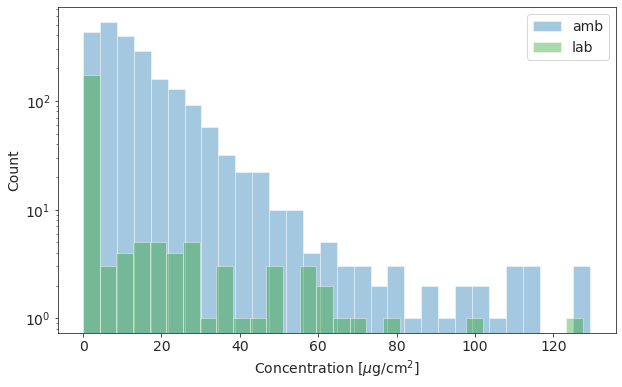

In [42]:
# Comparison : distribution of amb and lab

data = data_lab.append(data_amb)

fig = plt.figure(figsize=(10,6))
sns.distplot(data_amb['Concentration'], kde=False, bins=30, label='amb', color='tab:blue')
sns.distplot(data_lab['Concentration'], kde=False, bins=30, label='lab', color='tab:green')
plt.yscale('log')
plt.xlabel('Concentration [$\mu$g/cm$^{2}$]')
plt.ylabel('Count')
plt.legend()
plt.show();

In [43]:
fig.savefig('../outputs/dist_lab_amb.png', dpi=100, bbox_inches = "tight")

In [22]:
data_train_res = upsample_data(data_lab_train, data_amb_train)

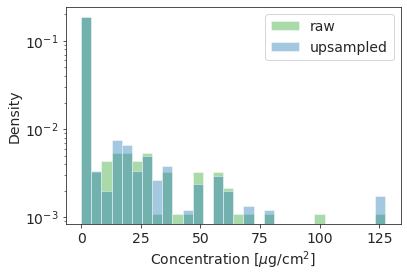

In [31]:
X_lab = data_lab[['Concentration']]
X_lab_res = data_train_res[['Concentration']].loc[data_train_res['Label'] == 'lab']

fig = plt.figure()
sns.distplot(X_lab, kde=False, bins=30, label='raw', color='tab:green', norm_hist=True)
sns.distplot(X_lab_res, kde=False, bins=30, label='upsampled', color='tab:blue', norm_hist=True)
plt.xlabel('Concentration [$\mu$g/cm$^{2}$]')
plt.ylabel('Density')
plt.yscale('log')
plt.legend()
plt.show()

In [32]:
fig.savefig('../outputs/Upsampling/dist_lab_res.png', dpi=100, bbox_inches = "tight")

In [34]:
X_lab_nz = X_lab[X_lab['Concentration'] != 0]
X_lab_res_nz = X_lab_res[X_lab_res['Concentration'] != 0]

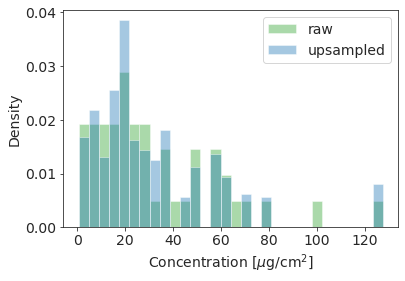

In [39]:
fig = plt.figure()
sns.distplot(X_lab_nz, kde=False, bins=30, label='raw', color='tab:green', norm_hist=True)
sns.distplot(X_lab_res_nz, kde=False, bins=30, label='upsampled', color='tab:blue', norm_hist=True)
plt.xlabel('Concentration [$\mu$g/cm$^{2}$]')
plt.ylabel('Density')
#plt.yscale('log')
plt.legend()
plt.show()

In [40]:
fig.savefig('../outputs/Upsampling/dist_lab_res_nz.png', dpi=100, bbox_inches = "tight")

In [44]:
ratio = len(X_lab_nz)/len(X_lab)
ratio_res = len(X_lab_res_nz)/len(X_lab_res)
print("Fraction non-zero values : {0:.3f}".format(ratio))
print("Fraction non-zero values after resampling : {0:.3f}".format(ratio_res))

Fraction non-zero values : 0.225
Fraction non-zero values after resampling : 0.215
